In [561]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

## 1. Data Gathering 

In [250]:
df=pd.read_csv('Pune_house_data.csv')
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


## 2 EDA 

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### analyzing each feature and converting into appropriate fromat

##### 1. 'area_type' analysis

In [251]:
df['area_type'].value_counts()  ## 4 types of areas are present

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [252]:
df['area_type'].value_counts().to_dict()

{'Super built-up  Area': 8790,
 'Built-up  Area': 2418,
 'Plot  Area': 2025,
 'Carpet  Area': 87}

In [253]:
df['area_type'].replace({'Super built-up  Area': 0,
 'Built-up  Area': 1,
 'Plot  Area': 2,
 'Carpet  Area': 3},inplace=True)

In [254]:
df['area_type'].value_counts()

0    8790
1    2418
2    2025
3      87
Name: area_type, dtype: int64

In [255]:
df['area_type'].isna().sum()

0

##### 2. 'availability' analysis

In [256]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [257]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
# ## pending
# 19-Jan  >> 2019-01 >> 2019+1/12
# 18-Dec  >> 2018-12 >> 2018+12/12
# 18-May  >> 2018-05 >> 2018+05/12          
# 18-Apr  >> 2018-04           
# 18-Aug  >> 2018-08           
# 15-Aug  >> 2015-08
# 15-Oct  >> 2015-10
# 15-Jan  >> 2015-01
# 15-Feb  >> 2015-02

In [66]:
df['availability'].replace({'Ready To Move':22,'Immediate Possession':22},inplace=True)

In [67]:
df['availability'].value_counts()

22        10597
18-Dec      307
18-May      295
18-Apr      271
18-Aug      200
          ...  
15-Aug        1
17-Jan        1
16-Nov        1
16-Jan        1
14-Jul        1
Name: availability, Length: 80, dtype: int64

In [72]:
avail=[]

for i in df['availability']:
    yr=str(i)[0:2]
    avail.append(int(yr))
len(avail)    

13320

In [232]:
df['yr_availability']=avail

In [258]:
df.drop('availability',inplace=True, axis=1)

In [234]:
df

,area_type,size,society,total_sqft,bath,balcony,price,site_location,yr_availability
0,0,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,19
1,2,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,22
2,1,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,22
3,0,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,22
4,0,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,22
...,...,...,...,...,...,...,...,...,...
13315,1,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan,22
13316,0,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road,22
13317,1,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut,22
13318,0,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road,18


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13320 non-null  int64  
 1   size             13304 non-null  object 
 2   society          7818 non-null   object 
 3   total_sqft       13320 non-null  object 
 4   bath             13247 non-null  float64
 5   balcony          12711 non-null  float64
 6   price            13320 non-null  float64
 7   site_location    13319 non-null  object 
 8   yr_availability  13320 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 936.7+ KB


##### 3. 'size' analysis

In [259]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [260]:
df['size'].replace({'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 0.5,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18},inplace=True)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   size           13304 non-null  float64
 2   society        7818 non-null   object 
 3   total_sqft     13320 non-null  object 
 4   bath           13247 non-null  float64
 5   balcony        12711 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13319 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 832.6+ KB


##### 4. 'society' analysis

In [262]:
df["society"].value_counts() #dropping this

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [263]:
df.drop('society',inplace=True,axis=1)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   size           13304 non-null  float64
 2   total_sqft     13320 non-null  object 
 3   bath           13247 non-null  float64
 4   balcony        12711 non-null  float64
 5   price          13320 non-null  float64
 6   site_location  13319 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 728.6+ KB


##### 5. 'total_sqft ' analysis

In [244]:
# df['total_sqft'].astype(int) #error

In [306]:
def sqft(i):
    # replacin range type sq area to mean of the range 
    if i.count('-')>0:
#         print(i)
        sq1=i.split('-')
        i=((float(sq1[0])+float(sq1[1]))/2)
#         print(i)
    
    elif i.count('Sq. Meter')==1:
#         print(i)
        return int(float(i.split('Sq. Meter')[0])*10.76)
    elif i.count('Sq. Yards')==1:
#         print(i)
        return int(float(i.split('Sq. Yards')[0])*9)
    elif i.count('Acres')==1:
#         print(i)
        return int(float(i.split('Acres')[0])*43560)
    elif i.count('Guntha')==1:
#         print(i)
        return int(float(i.split('Guntha')[0])*1076.39)
    elif i.count('Cents')==1:
#         print(i)
        return int(float(i.split('Cents')[0])*1)
    elif i.count('Perch')==1:
#         print(i)
        return int(float(i.split('Perch')[0])*272.25)
    elif i.count('Grounds')==1:
        print(i)
        return int(float(i.split('Grounds')[0])*2400)
    return i




In [316]:
df['total_sqft1']=df['total_sqft'].apply(sqft)

In [ ]:
df.drop('total_sqft',axis=1,inplace=True)

In [317]:
df['total_sqft1']=df['total_sqft1'].astype(float)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   size           13304 non-null  float64
 2   bath           13247 non-null  float64
 3   balcony        12711 non-null  float64
 4   price          13320 non-null  float64
 5   site_location  13319 non-null  object 
 6   total_sqft1    13320 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 728.6+ KB


##### 5. 'site_location' analysis

In [355]:
site_dict=df['site_location'].value_counts().to_dict()

In [362]:
for i,v in enumerate(site_dict):
    site_dict[v]=i+1

In [363]:
site_dict

{'Alandi Road': 1,
 'Kalyani Nagar': 2,
 'Mahatma Gandhi Road': 3,
 'Lulla Nagar': 4,
 'Laxmi Road': 5,
 'Law College Road': 6,
 'Ambegaon Budruk': 7,
 'Koregaon Park': 8,
 'Kondhwa Khurd': 9,
 'Kondhwa Budruk': 10,
 'Kondhwa': 11,
 'Kharadi': 12,
 'Khadki': 13,
 'Khadaki': 14,
 'Katraj': 15,
 'Kasba Peth': 16,
 'Karve Road': 17,
 'Mangalwar peth': 18,
 'Manik Bagh': 19,
 'Market yard': 20,
 'Padmavati': 21,
 'Pune Railway Station': 22,
 'Prabhat Road': 23,
 'Pirangut': 24,
 'Paud Road': 25,
 'Pashan': 26,
 'Parvati Darshan': 27,
 'Navi Peth': 28,
 'Model colony': 29,
 'Narayangaon': 30,
 'Narayan Peth': 31,
 'Nana Peth': 32,
 'Nagar Road': 33,
 'Mundhawa': 34,
 'Mukund Nagar': 35,
 'Karve Nagar': 36,
 'Kothrud': 37,
 'Jangali Maharaj Road': 38,
 'Bhavani Peth': 39,
 'Chandan Nagar': 40,
 'Camp': 41,
 'Bund Garden Road': 42,
 'Budhwar Peth': 43,
 'Bopodi': 44,
 'Bibvewadi': 45,
 'Bhandarkar Road': 46,
 'Deccan Gymkhana': 47,
 'Baner road': 48,
 'Baner': 49,
 'Hingne Khurd': 50,
 'Aundh

In [365]:
df.replace(site_dict,inplace=True)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   size           13304 non-null  float64
 2   bath           13247 non-null  float64
 3   balcony        12711 non-null  float64
 4   price          13320 non-null  float64
 5   site_location  13319 non-null  float64
 6   total_sqft1    13320 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 728.6 KB


#### balcony

In [376]:
#dropping balcony

df.drop('balcony',axis=1,inplace=True)


In [382]:
df.drop('bath',axis=1,inplace=True)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   size           13304 non-null  float64
 2   price          13320 non-null  float64
 3   site_location  13319 non-null  float64
 4   total_sqft1    13320 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 520.4 KB


In [469]:
##KNN imputation for bath and size

knn_impu=KNNImputer()
df1=knn_impu.fit_transform(df)
type(df1)
final_df=pd.DataFrame(df1,columns=df.columns)

In [470]:
final_df

,area_type,size,price,site_location,total_sqft1
0,0.0,2.0,39.07,1.0,1056.0
1,2.0,4.0,120.00,7.0,2600.0
2,1.0,3.0,62.00,53.0,1440.0
3,0.0,3.0,95.00,52.0,1521.0
4,0.0,2.0,51.00,51.0,1200.0
...,...,...,...,...,...
13315,1.0,5.0,231.00,26.0,3453.0
13316,0.0,4.0,400.00,25.0,3600.0
13317,1.0,2.0,60.00,24.0,1141.0
13318,0.0,4.0,488.00,23.0,4689.0


In [471]:
final_df = final_df[['area_type', 'site_location', 'size', 'total_sqft1','price']]

In [472]:
final_df

,area_type,site_location,size,total_sqft1,price
0,0.0,1.0,2.0,1056.0,39.07
1,2.0,7.0,4.0,2600.0,120.00
2,1.0,53.0,3.0,1440.0,62.00
3,0.0,52.0,3.0,1521.0,95.00
4,0.0,51.0,2.0,1200.0,51.00
...,...,...,...,...,...
13315,1.0,26.0,5.0,3453.0,231.00
13316,0.0,25.0,4.0,3600.0,400.00
13317,1.0,24.0,2.0,1141.0,60.00
13318,0.0,23.0,4.0,4689.0,488.00


In [395]:
final_df.corr()

,area_type,site_location,size,total_sqft1,price
area_type,1.000000,-0.016151,0.376287,0.035798,0.237181
site_location,-0.016151,1.000000,-0.004719,0.014765,-0.013070
size,0.376287,-0.004719,1.000000,0.045418,0.398417
total_sqft1,0.035798,0.014765,0.045418,1.000000,0.048267
price,0.237181,-0.013070,0.398417,0.048267,1.000000


<AxesSubplot:>

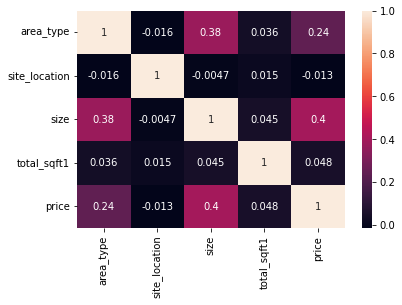

In [403]:
sns.heatmap(final_df.corr(),annot=True)

### linear Regression

In [418]:
saved_df=final_df

In [459]:
saved_df

,area_type,site_location,size,price
0,0.0,1.0,2.0,39.07
1,2.0,7.0,4.0,120.00
2,1.0,53.0,3.0,62.00
3,0.0,52.0,3.0,95.00
4,0.0,51.0,2.0,51.00
...,...,...,...,...
13315,1.0,26.0,5.0,231.00
13316,0.0,25.0,4.0,400.00
13317,1.0,24.0,2.0,60.00
13318,0.0,23.0,4.0,488.00


In [460]:
final_df.drop(['area_type'],axis=1,inplace=True)

C:\Windows\Temp\ipykernel_2092\3092467911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(['area_type'],axis=1,inplace=True)


In [461]:
x=final_df.drop('price',axis=1)
y=final_df['price']

x.head()

,site_location,size
0,1.0,2.0
1,7.0,4.0
2,53.0,3.0
3,52.0,3.0
4,51.0,2.0


In [462]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10656, 2), (2664, 2), (10656,), (2664,))

In [463]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [464]:
y_pred=lin_reg.predict(x_test)
y_pred_train=lin_reg.predict(x_train)

In [465]:
#test data eval

def model_eval(actual,predicted):
    r2score=r2_score(actual,predicted)
    print(f'R2 score = {r2score}')
    
    mse=mean_squared_error(actual,predicted)
    print(f'MSE of model = {mse}')
    
    mae=mean_absolute_error(actual,predicted)
    print(f'MAE of model = {mae}')

In [466]:
model_eval(y_test,y_pred)

R2 score = 0.18306233363761015
MSE of model = 19635.206200163448
MAE of model = 58.89719978173434


### decision tree

In [474]:
saved_df=final_df.copy

In [475]:
final_df

,area_type,site_location,size,total_sqft1,price
0,0.0,1.0,2.0,1056.0,39.07
1,2.0,7.0,4.0,2600.0,120.00
2,1.0,53.0,3.0,1440.0,62.00
3,0.0,52.0,3.0,1521.0,95.00
4,0.0,51.0,2.0,1200.0,51.00
...,...,...,...,...,...
13315,1.0,26.0,5.0,3453.0,231.00
13316,0.0,25.0,4.0,3600.0,400.00
13317,1.0,24.0,2.0,1141.0,60.00
13318,0.0,23.0,4.0,4689.0,488.00


In [477]:
dtree=DecisionTreeRegressor(random_state=10)

In [479]:
x=final_df.drop('price',axis=1)
y=final_df['price']

In [480]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10656, 4), (2664, 4), (10656,), (2664,))

In [481]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [482]:
y_pred=dtree.predict(x_test)

In [483]:
y_pred_train=dtree.predict(x_train)

In [484]:
model_eval(y_test,y_pred)

R2 score = 0.4677163221755418
MSE of model = 12793.509470070592
MAE of model = 47.38584084084084


In [485]:
model_eval(y_train,y_pred_train)

R2 score = 0.9939027072736875
MSE of model = 132.4848982471534
MAE of model = 1.9756788976476476


In [ ]:
## Hyper tuning

In [502]:
model=DecisionTreeRegressor()

hyp={
    'criterion':['squared_error','absolute_error'],
    'max_depth':np.arange(2,10),
    'min_samples_leaf':np.arange(2,20),
    'min_samples_split': np.arange(10,20),
    }

In [503]:
rscv=RandomizedSearchCV(model,hyp)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [505]:
rscv.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=17, min_samples_split=14)

In [506]:
hyp_dtree=DecisionTreeRegressor(max_depth=4, min_samples_leaf=17, min_samples_split=14)

In [508]:
hyp_dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=17, min_samples_split=14)

In [509]:
y_pred=hyp_dtree.predict(x_test)

In [510]:
y_pred_train=hyp_dtree.predict(x_train)

In [511]:
model_eval(y_test,y_pred)

R2 score = 0.648782629659561
MSE of model = 8441.556524649894
MAE of model = 39.634327277359404


In [512]:
model_eval(y_train,y_pred_train)

R2 score = 0.5457845332153021
MSE of model = 9869.411327352744
MAE of model = 39.79188412171887


### ramdom_forest

In [514]:
final_df

,area_type,site_location,size,total_sqft1,price
0,0.0,1.0,2.0,1056.0,39.07
1,2.0,7.0,4.0,2600.0,120.00
2,1.0,53.0,3.0,1440.0,62.00
3,0.0,52.0,3.0,1521.0,95.00
4,0.0,51.0,2.0,1200.0,51.00
...,...,...,...,...,...
13315,1.0,26.0,5.0,3453.0,231.00
13316,0.0,25.0,4.0,3600.0,400.00
13317,1.0,24.0,2.0,1141.0,60.00
13318,0.0,23.0,4.0,4689.0,488.00


In [564]:
final_df.describe()

,area_type,site_location,size,total_sqft1,price
count,13320.000000,13320.000000,13320.000000,1.332000e+04,13320.000000
mean,0.505180,48.434940,2.804107,1.862496e+03,112.565627
std,0.770234,27.695329,1.295665,1.632844e+04,148.971674
min,0.000000,1.000000,0.500000,1.000000e+00,8.000000
25%,0.000000,24.000000,2.000000,1.100000e+03,50.000000
50%,0.000000,48.000000,3.000000,1.277000e+03,72.000000
75%,1.000000,72.000000,3.000000,1.680000e+03,120.000000
max,3.000000,97.000000,43.000000,1.306800e+06,3600.000000


In [515]:
x=final_df.drop('price',axis=1)
y=final_df['price']

In [516]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10656, 4), (2664, 4), (10656,), (2664,))

In [517]:
rforest=RandomForestRegressor(random_state=10)

In [518]:
rforest.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [520]:
y_pred=rforest.predict(x_test)

In [521]:
y_pred_train=rforest.predict(x_train)

In [522]:
model_eval(y_test,y_pred)

R2 score = 0.661982745874008
MSE of model = 8124.2899639208745
MAE of model = 38.503989464419774


In [523]:
model_eval(y_train,y_pred_train)

R2 score = 0.9245314271041084
MSE of model = 1639.817317253343
MAE of model = 15.880253863798524


In [ ]:
# Hypertuning

In [533]:
model=RandomForestRegressor()
hyp={
    'n_estimators':np.arange(10,50,10),
    'max_depth':np.arange(4,10),
    'min_samples_leaf':np.arange(2,20),
    'min_samples_split': np.arange(10,20),
    
     }

In [534]:
hyper=RandomizedSearchCV(model,hyp)
hyper.fit(x_train,y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 20, 30, 40])})

In [532]:
hyper.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=8, min_samples_split=15,
                      n_estimators=40)

In [538]:
hyp_rforest=RandomForestRegressor(max_depth=9, min_samples_leaf=8, min_samples_split=15,
                      n_estimators=40)

In [539]:
hyp_rforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=8, min_samples_split=15,
                      n_estimators=40)

In [540]:
y_pred=hyp_rforest.predict(x_test)

In [541]:
y_pred_train=hyp_rforest.predict(x_train)

In [542]:
model_eval(y_test,y_pred)

R2 score = 0.6647931786408952
MSE of model = 8056.7408360477
MAE of model = 36.07455804955753


In [543]:
model_eval(y_train,y_pred_train)

R2 score = 0.6426000821119207
MSE of model = 7765.756685849568
MAE of model = 33.991786802309704


In [562]:
with open ('model.pkl','wb') as file:
    pickle.dump(hyp_rforest,file)

In [ ]:
##
area type
{
    'Super built-up  Area': 0,
    'Built-up  Area': 1,
    'Plot  Area': 2,
    'Carpet  Area': 3
}

In [ ]:
## 
site location

{'Alandi Road': 1,
 'Kalyani Nagar': 2,
 'Mahatma Gandhi Road': 3,
 'Lulla Nagar': 4,
 'Laxmi Road': 5,
 'Law College Road': 6,
 'Ambegaon Budruk': 7,
 'Koregaon Park': 8,
 'Kondhwa Khurd': 9,
 'Kondhwa Budruk': 10,
 'Kondhwa': 11,
 'Kharadi': 12,
 'Khadki': 13,
 'Khadaki': 14,
 'Katraj': 15,
 'Kasba Peth': 16,
 'Karve Road': 17,
 'Mangalwar peth': 18,
 'Manik Bagh': 19,
 'Market yard': 20,
 'Padmavati': 21,
 'Pune Railway Station': 22,
 'Prabhat Road': 23,
 'Pirangut': 24,
 'Paud Road': 25,
 'Pashan': 26,
 'Parvati Darshan': 27,
 'Navi Peth': 28,
 'Model colony': 29,
 'Narayangaon': 30,
 'Narayan Peth': 31,
 'Nana Peth': 32,
 'Nagar Road': 33,
 'Mundhawa': 34,
 'Mukund Nagar': 35,
 'Karve Nagar': 36,
 'Kothrud': 37,
 'Jangali Maharaj Road': 38,
 'Bhavani Peth': 39,
 'Chandan Nagar': 40,
 'Camp': 41,
 'Bund Garden Road': 42,
 'Budhwar Peth': 43,
 'Bopodi': 44,
 'Bibvewadi': 45,
 'Bhandarkar Road': 46,
 'Deccan Gymkhana': 47,
 'Baner road': 48,
 'Baner': 49,
 'Hingne Khurd': 50,
 'Aundh Road': 51,
 'Aundh': 52,
 'Anandnagar': 53,
 'Dapodi': 54,
 'Balaji Nagar': 55,
 'Dehu Road': 56,
 'Ganeshkhind': 57,
 'Dhankawadi': 58,
 'Hadapsar Industrial Estate': 59,
 'Guruwar peth': 60,
 'Gultekdi': 61,
 'Gokhale Nagar': 62,
 'Ghorpade Peth': 63,
 'Hadapsar': 64,
 'Ganesh Peth': 65,
 'Dhayari Phata': 66,
 'Fergusson College Road': 67,
 'Fatima Nagar': 68,
 'Erandwane': 69,
 'Dhole Patil Road': 70,
 'Tilak Road': 71,
 'Uruli Devachi': 72,
 'Vadgaon Budruk': 73,
 'Wadgaon Sheri': 74,
 'Viman Nagar': 75,
 'Wakadewadi': 76,
 'Vishrant Wadi': 77,
 'Wagholi': 78,
 'Yerawada': 79,
 'Wanowrie': 80,
 'Warje': 81,
 'Somwar Peth': 82,
 'Swargate': 83,
 'Sasson Road': 84,
 'Sinhagad Road': 85,
 'Shukrawar Peth': 86,
 'Shivaji Nagar': 87,
 'Shaniwar Peth': 88,
 'Senapati Bapat Road': 89,
 'Satara Road': 90,
 'Salunke Vihar': 91,
 'Sahakar Nagar': 92,
 'Sadashiv Peth': 93,
 'Raviwar Peth': 94,
 'Rasta Peth': 95,
 'Ghorpadi': 96,
 'other': 97}